# Boston AirBNB Data Science Case Study - Part II

## Data Modelling Part II

In [1]:
# Import nessecary packages and libararies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr 
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.metrics import r2_score, explained_variance_score , mean_squared_error
from    VizTools import VizTool
from HelperFunc import HelperFunction
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
# Intialize instances from needed classes
# Intitialize an instance from the visualization class 
visualize = VizTool ()
# plt.style.use('./plotting_style.mplstyle')
# Intitialize an instance from the HelperFunction class 
helper = HelperFunction()

In [2]:
# Save file to csv, for ML notebook
boston_ml_dataset = pd.read_csv('BostonMlReadyDataset.csv')

In [3]:
# Prepare data for model fitting
TEST_SIZE = 0.3
RANDOM_VAR = 42

X = boston_ml_dataset.drop(columns = ['price']);
Y = boston_ml_dataset.price;
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= TEST_SIZE, random_state= RANDOM_VAR);

In [4]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
preds = regression_model.predict(X_test)

In [6]:
R2_Score = r2_score(Y_test, preds)
R2_Score

0.6030789957987206

In [7]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RANDOM_VAR, 
                               n_jobs=-1)
forest.fit(X_train, Y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)



In [8]:
print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_preds),
        mean_squared_error(Y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_preds),
        r2_score(Y_test, y_test_preds)))

Random Forest MSE train: 86.611, test: 447.006
Random Forest R^2 train: 0.996, test: 0.981


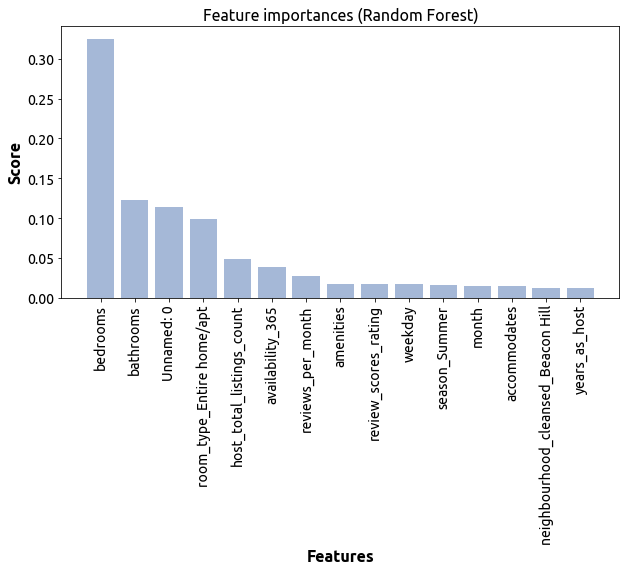

In [9]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

## Results Evaluation
From the previous figures and questions we can recommend the following for any future Airbnb user in Boston, who is looking for a cheap rental price:
* **Reserve a property far from the waterfront area**: It has been observed that as far you are from the waterfront, the cheapest the rental price you will get. Additionally, these places are not much affected by the season. Therefore, these places are all-year low price districts.
* **Look for hosts with a moderate count of listings**: We have seen that the hosts' group with listings count between [3–14] has a moderate price range as the previous groups. Yet, they are subjected to be more experienced than the low count group.
* **Plan well for the property type you need**: It appears that the most influencing features on the price range are the property attributes. Therefore, plan well for the number of beds and bedrooms you need.